---


In [31]:
%pip install matplotlib seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('../data/clean-data/sf_clean_data_grouped.csv')
data.head()

Note: you may need to restart the kernel to use updated packages.


,Incident Number,Incident Datetime,Incident Category,Incident Description,Police District,Resolution,Latitude,Longitude,Incident Day of Week,Year,Focus Group
0,160204156,2016-03-03 19:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Taraval,NONE,37.707968,-122.463545,Thursday,2016,Property Crime
1,130119109,2013-02-10 18:09:00,ASSAULT,BATTERY,Mission,NONE,37.754222,-122.425237,Sunday,2013,Violent Crime
2,61026720,2006-09-25 22:15:00,ASSAULT,BATTERY,Northern,NONE,37.778486,-122.425839,Monday,2006,Violent Crime
3,110493133,2011-06-19 13:06:00,TRESPASS,TRESPASSING,Taraval,NONE,37.729185,-122.466758,Sunday,2011,Property Crime
4,80749068,2008-05-23 12:10:00,ASSAULT,BATTERY,Northern,NONE,37.775904,-122.423582,Friday,2008,Violent Crime


---
## Assignment 1.2: Crime Profiles by Police District

Different parts of the city have very different crime patterns. Here we quantify that using conditional probabilities.

*Draws from*: Week 3, Exercises 2.1 and 2.2.

> * For each police district in your dataset, compute the **conditional crime profile**: for each of your Personal Focus Crimes, calculate
>
>   $$r(\text{crime}, \text{district}) = \frac{P(\text{crime} \mid \text{district})}{P(\text{crime})}$$
>
>   A value above 1 means that crime type is *over-represented* in that district relative to the city-wide average; below 1 means it is *under-represented*.
> * Visualize these ratios in a way that makes it easy to compare across both districts and crime types. (Simple barcharts are fine, but you may also use ideas from more complex visualization techniques, for example, a heatmap could work well here, but you're free to choose another format if you can justify it.)
> * Pick **one district** whose profile stands out to you. Describe the pattern and offer an explanation for why that district looks the way it does. Are there geographic, demographic, or other factors that might explain it?

### Step 1: Calculate Crime Ratios

First, we remove rows with 'Out of SF' (crimes outside the city) to focus on San Francisco's districts.


In [18]:
# We will create a pivot table of counts
counts = pd.crosstab(data['Police District'], data['Focus Group'])

# 1. Calculate P(crime | district)
# Divide each row by the sum of that row (total crimes in that district)
p_crime_given_district = counts.div(counts.sum(axis=1), axis=0)

# 2. Calculate P(crime)
# Total count of each crime divided by total number of all crimes
p_crime = counts.sum(axis=0) / counts.sum().sum()

# 3. Calculate the ratio r
# Divide the conditional probabilities by the global probabilities
crime_profile = p_crime_given_district.divide(p_crime, axis=1)
crime_profile_drop_outsf = crime_profile.drop('Out Of Sf')
crime_profile_drop_outsf

Focus Group,Administrative,Drug & Alcohol,Financial Crime,Non-Criminal,Other/Suspicious,Property Crime,Public Order,Sex Offenses,Violent Crime,Weapons
Police District,,,,,,,,,,
Bayview,1.095476,0.749083,0.723637,0.972864,1.276849,0.877876,0.799856,0.768916,1.224703,1.961486
Central,0.681559,0.379623,1.162366,0.968605,0.760881,1.253179,0.876865,0.891192,0.869915,0.610987
Ingleside,0.823321,0.495137,1.017404,0.977779,1.177907,0.979670,0.680828,1.076376,1.206030,1.420751
Mission,1.185742,1.220993,0.875659,0.888286,1.112533,0.853347,1.876766,1.327872,1.180120,1.222504
Northern,0.789287,0.664880,0.970603,0.807935,0.818739,1.221578,1.176137,0.905946,0.881757,0.691850
Park,0.890952,0.877937,0.890237,1.270827,0.928208,1.077725,0.686029,0.942335,0.739890,0.622916
Richmond,0.548611,0.394803,1.181427,1.075075,0.911486,1.247066,0.528743,0.805438,0.674152,0.520372
Southern,1.138922,1.066339,1.065708,0.995551,0.969636,1.005564,0.677333,1.194405,0.974948,0.801954
Taraval,0.642393,0.405270,1.479599,1.078305,1.021221,1.107274,0.790670,0.978343,0.844205,0.748754


### A heatmap makes it easier to compare crime concentrations across districts.

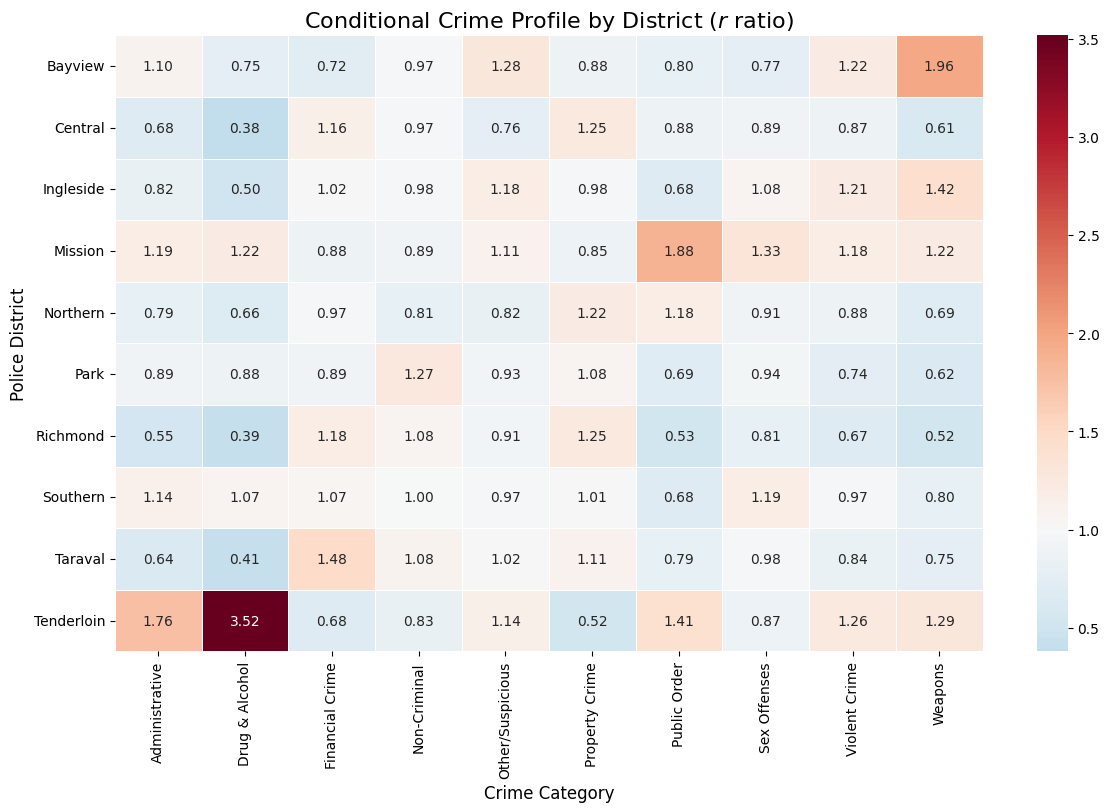

In [11]:
plt.figure(figsize=(14, 8))

# We use a log scale or center the colormap at 1.0
# Values > 1 are "more than average", values < 1 are "less than average"
sns.heatmap(crime_profile_drop_outsf, 
            annot=True, 
            fmt=".2f", 
            cmap='RdBu_r', 
            center=1.0,
            linewidths=.5)

plt.title('Conditional Crime Profile by District ($r$ ratio)', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Police District', fontsize=12)
plt.show()

### The Heatmap

Darker red = over-represented in that district. Darker blue = under-represented.


### Key Outliers

| District | Crime Type | Ratio | Context |
|----------|-----------|-------|---------|
| **Tenderloin** | Drug Offense | 3.52 | Over 3× city average—severe drug concentration |
| **Bayview** | Weapons | 1.96 | Elevated illegal firearm & assault incidents |
| **Mission** | Public Order | 1.88 | Higher rates of disorderly conduct, prostitution, loitering |


### Step 2: Most Evenly Distributed Crime

Lower standard deviation = more uniform distribution across all districts.
This means that there is a small variation in terms of calling in non-criminal activities (such as: missing person, suicide or lost property) across San Francisco, meaning - there aren't districts where these activites occur more than in others. Interestingly, the following category is **Other/Suspicious** followed closely by **Sexual offenses**. Unlike crimes related to drug abuse or weapons, there isn't a district where these crimes would be largely prevalent.

In [47]:
# Calculate the Standard Deviation for each crime across all districts
# A lower value means the crime is distributed proportionally across the whole city
regularity = crime_profile_drop_outsf.std().sort_values()

most_regular_crime = regularity.index[0]
print(f"The most 'regularly' distributed crime across SF is: {most_regular_crime}")
print("-" * 30)
print(regularity)

The most 'regularly' distributed crime across SF is: Non-Criminal
------------------------------
Focus Group
Non-Criminal        0.134771
Other/Suspicious    0.164671
Sex Offenses        0.175920
Violent Crime       0.216098
Property Crime      0.226542
Financial Crime     0.235768
Administrative      0.355729
Public Order        0.417042
Weapons             0.466080
Drug & Alcohol      0.938621
dtype: float64


### Step 3: Safety Index by District

Average r-value per district. Lower = safer (below city average).


In [36]:
# Calculate the mean of the r-values for each district (row-wise)
# We sort ascending so the 'safest' (lowest average) appears at the top
safety_index = crime_profile_drop_outsf.mean(axis=1).sort_values()

# Convert to a readable DataFrame
safety_df = safety_index.to_frame(name='Safety Index')
print("Safety Index Ranking: ")
print(safety_df)

Safety Index Ranking: 
                 Safety Index
Police District              
Richmond             0.788717
Central              0.845517
Park                 0.892706
Northern             0.892871
Taraval              0.909603
Ingleside            0.985520
Southern             0.989036
Bayview              1.045075
Mission              1.174382
Tenderloin           1.326737


**Richmond** is the safest district (~21% below average), while **Tenderloin** is the most stressed (~33% above average).


### Step 4: "Capitals" of Each Crime Type

Which district has the highest concentration for each crime?


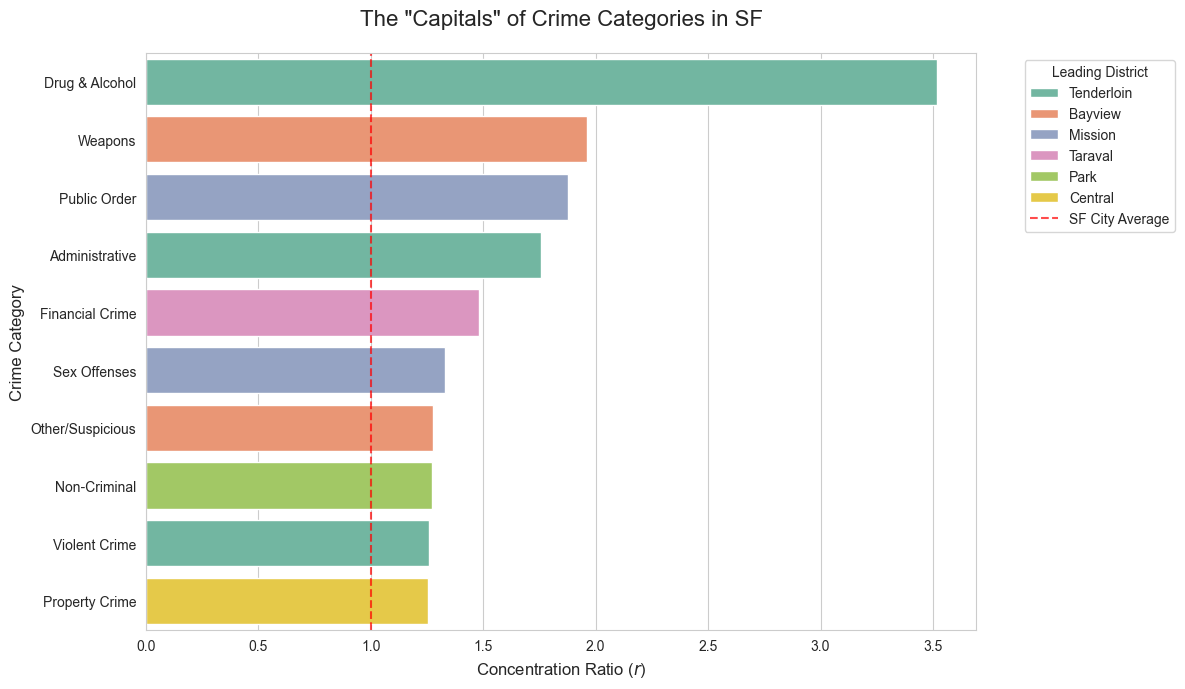

In [29]:
# Identify the 'capital' (district with max r) for each crime
capitals = crime_profile_drop_outsf.idxmax()
max_r_values = crime_profile_drop_outsf.max()

# Create a summary table for plotting
capitals_summary = pd.DataFrame({
    'District': capitals,
    'Concentration': max_r_values
}).sort_values(by='Concentration', ascending=False)

# Visualization
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create a horizontal bar chart
barplot = sns.barplot(
    x='Concentration', 
    y=capitals_summary.index, 
    hue='District', 
    data=capitals_summary, 
    palette='Set2',
    dodge=False
)

# Add a vertical line at r=1 (The City Average)
plt.axvline(1, color='red', linestyle='--', alpha=0.7, label='SF City Average')

# Customizing the labels
plt.title('The "Capitals" of Crime Categories in SF', fontsize=16, pad=20)
plt.xlabel('Concentration Ratio ($r$)', fontsize=12)
plt.ylabel('Crime Category', fontsize=12)
plt.legend(title='Leading District', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### More through look at Tenderloin

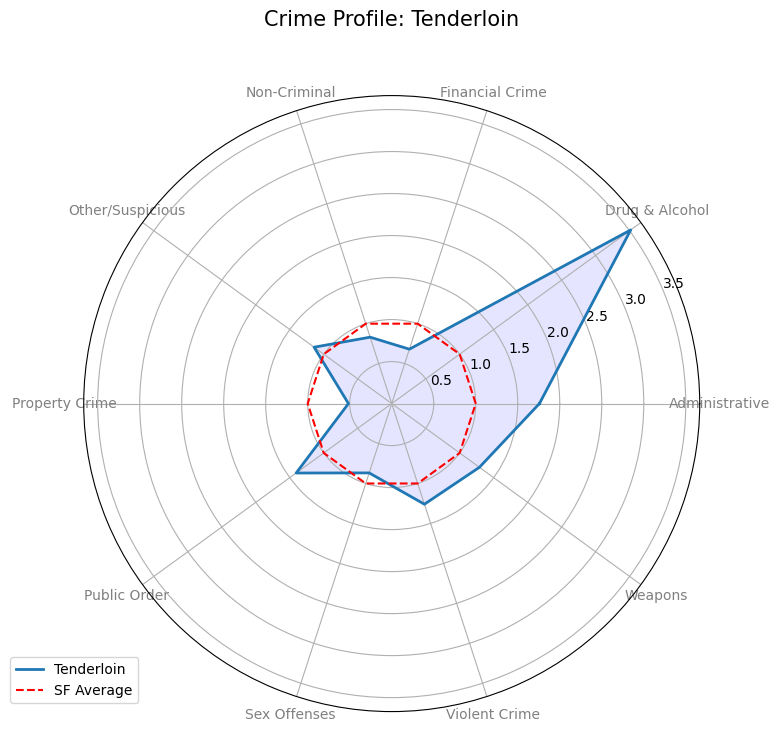

In [13]:
from math import pi

def plot_district_fingerprint(district_name, data):
    categories = list(data.columns)
    N = len(categories)
    
    # What will be the angle of each axis in the plot?
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)
    
    # The values for the specific district
    values = data.loc[district_name].values.flatten().tolist()
    values += values[:1]
    
    # Plot data
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=district_name)
    ax.fill(angles, values, 'b', alpha=0.1)
    
    # Add a circular line at r=1 (The City Average)
    ax.plot(angles, [1.0] * (N + 1), color='red', linestyle='--', label='SF Average')
    
    plt.title(f'Crime Profile: {district_name}', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Example usage for one district
plt.figure(figsize=(8, 8))
plot_district_fingerprint('Tenderloin', crime_profile_drop_outsf)
plt.show()

### Deeper dive into the various crime categories in Tenderloin district

C:\Users\sofia\AppData\Local\Temp\ipykernel_19808\2387358995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


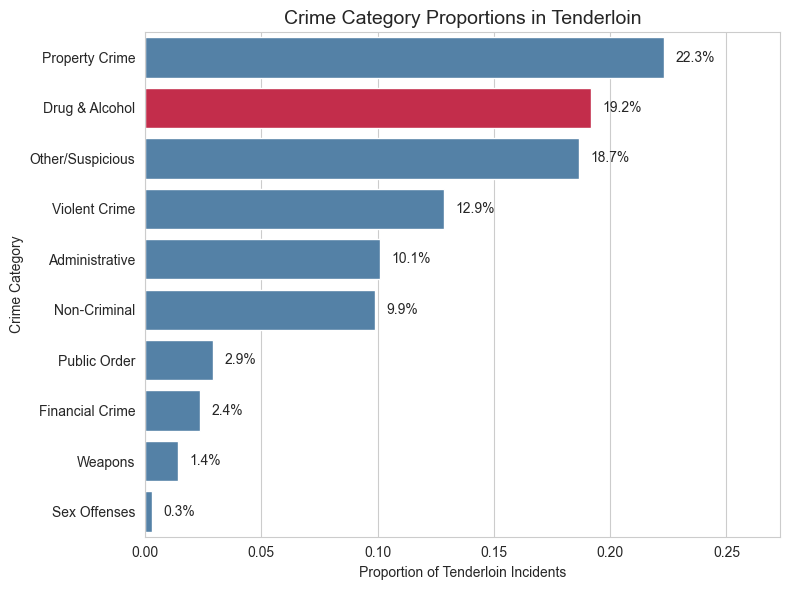

In [42]:
# Compute proportions of crime categories within Tenderloin
tender = data[data['Police District'] == 'Tenderloin']
tender_counts = tender['Focus Group'].value_counts()
tender_props = tender_counts / tender_counts.sum()

# highlight both drug- and alcohol-related categories
keywords = ['Drug', 'Alcohol']
colors = ['crimson' if any(k in cat for k in keywords) else 'steelblue' 
          for cat in tender_props.index]

plt.figure(figsize=(8, 6))

bar = sns.barplot(
    x=tender_props.values,
    y=tender_props.index,
    palette=colors
)

plt.title('Crime Category Proportions in Tenderloin', fontsize=14)
plt.xlabel('Proportion of Tenderloin Incidents')
plt.ylabel('Crime Category')

# Annotate percentages
for i, v in enumerate(tender_props.values):
    plt.text(v + 0.005, i, f"{v:.1%}", va='center')

plt.xlim(0, tender_props.max() + 0.05)
plt.tight_layout()
plt.show()

We can see that the most prevalent crime is Larceny/Theft which is very closely followed by charges related to drug & alcohol abuse. For an even deeper dive, we shall have a look at the various crime incidents based on the incident category it was originally called in. 

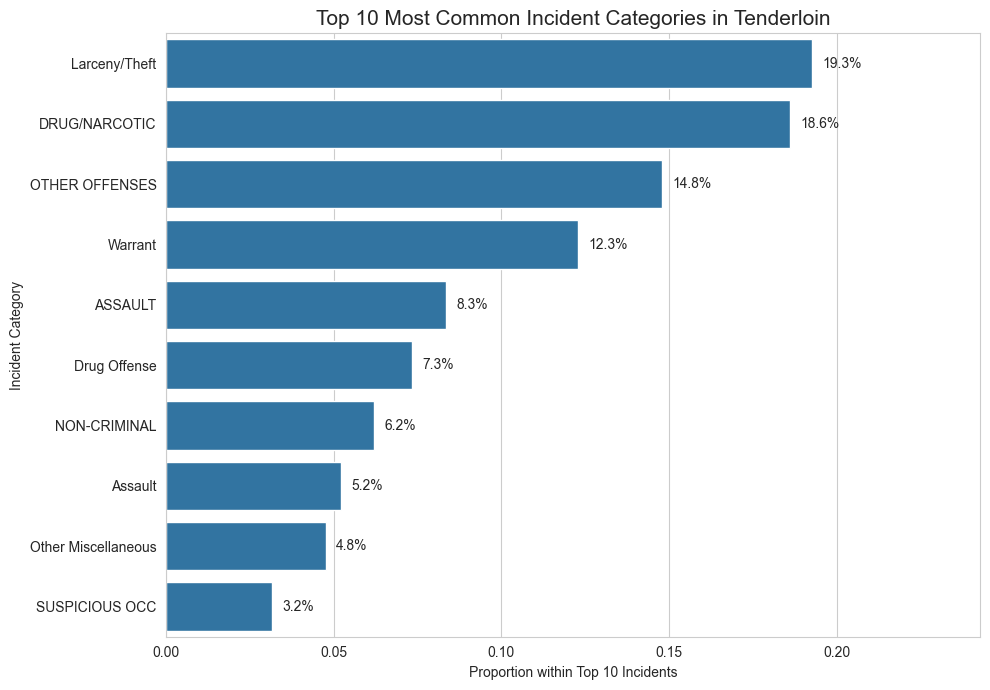

In [ ]:
# Filter Tenderloin data
import re

tender = data[data['Police District'] == 'Tenderloin'].copy()

# merge similar "Larceny" labels in Incident Category
mask = tender['Incident Category'].str.contains('Larceny', case=False, na=False)
tender.loc[mask, 'Incident Category'] = 'Larceny/Theft'
mask_warrant = tender['Incident Category'].str.contains('Warrant', case=False, na=False)
tender.loc[mask_warrant, 'Incident Category'] = 'Warrant'

# Get top 10 most common Incident Categories
top10_counts = tender['Incident Category'].value_counts().head(10)

# Convert to proportions
top10_props = top10_counts / top10_counts.sum()

plt.figure(figsize=(10, 7))

bar = sns.barplot(
    x=top10_props.values,
    y=top10_props.index
)

plt.title('Top 10 Most Common Incident Categories in Tenderloin', fontsize=15)
plt.xlabel('Proportion within Top 10 Incidents')
plt.ylabel('Incident Category')

# Annotate percentages
for i, v in enumerate(top10_props.values):
    plt.text(v + 0.003, i, f"{v:.1%}", va='center')

plt.xlim(0, top10_props.max() + 0.05)
plt.tight_layout()
plt.show()

### District Deep Dive: Tenderloin

**Drug crimes in Tenderloin: r = 3.52** (3× city average)

The Tenderloin district exhibits dramatic over-representation of drug and substance-abuse offenses. This aligns with extensive reporting on the neighborhood's battles with open-air drug markets and the [ongoing fentanyl crisis](https://www.sfchronicle.com/projects/san-francisco-drug-overdose-deaths/). High rates of homelessness, trafficking, and public health emergencies converge to create this distinct crime profile.
<br>
Interestingly, the neighbourhood also exceeds in Administrative crimes, which is likely due to the ammount of **Warrants** issued for various drg searches. <br>
Despite this, we can see the most prevalent crime is still Larceny/Theft as is across the entire San Francisco.

---